# Avaliando diferentes modelos
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [85]:
import pandas as pd

In [86]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [87]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris = iris[iris.target != 0]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


### Separando os dados
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [88]:
X = iris.drop('target',axis=1)
y = iris.target

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualizando os dados

**Da mesma forma do projeto 3, também podemos usar o seaborn para tornar o visual mais amigável**
- Do seaborn, podemos usar o `.pairplot()`
    - Usando o parâmetro `hue` podemos escolher qual coluna vai definir a cor dos nossos dados

In [92]:
X_view = pd.concat([X_train,y_train],axis=1)
X_view.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
105,7.6,3.0,6.6,2.1,2
138,6.0,3.0,4.8,1.8,2
76,6.8,2.8,4.8,1.4,1
92,5.8,2.6,4.0,1.2,1
119,6.0,2.2,5.0,1.5,2


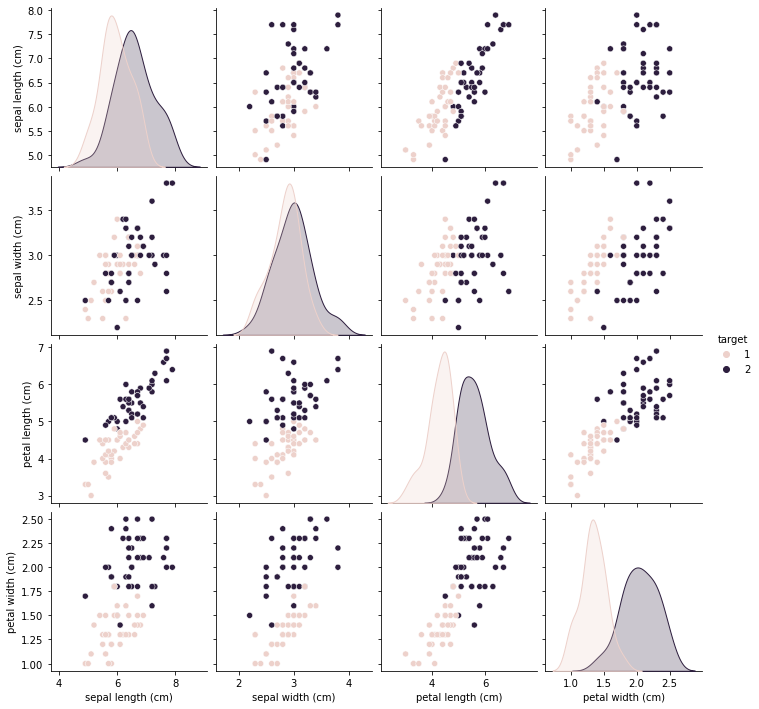

In [95]:
import seaborn as sns
sns.pairplot(X_view,hue='target');

**Visualizando os dados no matplotlib**

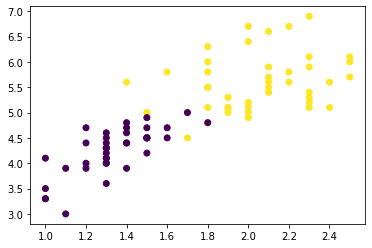

In [96]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

plt.show()

### Separando esses dados utilizando uma reta

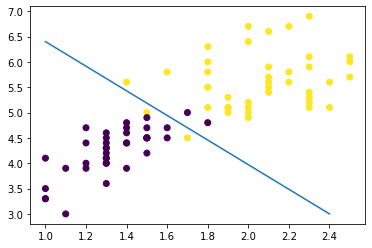

In [127]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

# Criar o plot de uma reta
x_reta = [2.4,1]
y_reta = [3,6.4]
ax.plot(x_reta,y_reta)

plt.show()

In [ ]:
y = ax + b

  x  y
(2.4,3) -> 3=a.2.4 + b
(1,6.4) -> 6.4=a.1+b

3-6.4=(2.4-1).a
-3.4=1.4.a
a=-3.4/1.4
a=-1.7/0.7

3-a.2.4=b
b=3-2.4a

In [134]:
a=-1.7/0.7
b=3-2.4*a

def clf_reta(x,y):
    y_modelo=a*x+b
    
    # Se y_ponto > y_funcao: class 2
    if y >= y_modelo:
        return 2
    # Se y_ponto < y_funcao: class 1
    elif y < y_modelo:
        return 1

### Separando esses dados utilizando árvore de decisão

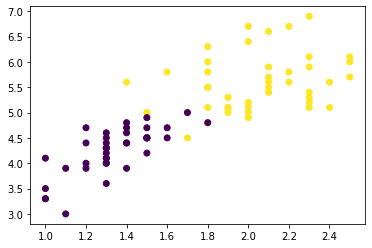

In [149]:
# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

# ax.set(xlim=(1.35,1.85),ylim=(5, 8))

plt.show()

In [ ]:
'petal width (cm)' >= 1.9 -> class:2
'petal width (cm)' <= 1.3 -> class:1
'petal length (cm)' <= 5 e 'petal width (cm)' entre 1.3 e 1.9 -> class: 1
'petal length (cm)' > 5 e 'petal width (cm)' entre 1.3 e 1.9 -> class: 2    

In [150]:
def clf_arvore(x,y):
    if x >= 1.9:
        return 2
    elif x <= 1.3:
        return 1
    elif y <= 5:
        return 1
    elif y > 5:
        return 2

### Aplicando a função nos dados de treino e teste

In [151]:
# Dados de treino
y_modelo_reta_treino = X_train.apply(lambda x:clf_reta(x['petal width (cm)'],x['petal length (cm)']),axis=1)
y_modelo_arvore_treino = X_train.apply(lambda x:clf_arvore(x['petal width (cm)'],x['petal length (cm)']),axis=1)

In [162]:
# Dados de teste
y_modelo_reta_teste = X_test.apply(lambda x:clf_reta(x['petal width (cm)'],x['petal length (cm)']),axis=1)
y_modelo_arvore_teste = X_test.apply(lambda x:clf_arvore(x['petal width (cm)'],x['petal length (cm)']),axis=1)

### Avaliando o modelo

- Para avaliar o modelo, vamos começar utilizando a matriz de confusão (confusion matrix)
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [185]:
# Para a reta
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_modelo_reta_teste)

array([[11,  1],
       [ 1,  7]], dtype=int64)

In [186]:
# Para a árvore                                                 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_modelo_arvore_teste)

array([[11,  1],
       [ 3,  5]], dtype=int64)

In [ ]:
    modelo
    1    2
1   11   1    VN   FP
2   1    7    FN   VP

In [ ]:
P = VP / (VP + FP)
R = VP / (VP + FN)

- Vamos calcular a acurácia
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [175]:
# Para a reta
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_modelo_reta_teste)

0.9

In [176]:
# Para a árvore
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_modelo_arvore_teste)

0.8

- E então vamos utilizar a precisão
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [221]:
# Para a reta
from sklearn.metrics import precision_score
precision_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [220]:
# Para a árvore
from sklearn.metrics import precision_score
precision_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.8333333333333334

- E o recall
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [222]:
# Para a reta
from sklearn.metrics import recall_score
recall_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [223]:
# Para a árvore
from sklearn.metrics import recall_score
recall_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.625